In [131]:
from IPython.display import HTML, display, YouTubeVideo, VimeoVideo, Image
import numpy as np
import matplotlib as mpl
import matplotlib.image as mpimg
%pylab inline
np.set_printoptions(suppress=True, precision=3)
def show_image(img, interpolation=None):
    figure(figsize=(10,6))
    plt.imshow(img, interpolation=interpolation)
    plt.colorbar()
def chopped(original, level=5, level2=0, N=8):
    chopped = original.copy()
    for x in range(N):
        for y in range(N):
            if x+y > level or x+y<level2:
                chopped[x,y] = 0.
    return chopped
def dct_all(img, level): 
    img2 = img.copy()
    for i in range(0,img.shape[0]-8,8):
        for j in range(0,img.shape[1]-8,8):
            tinyDCT = doDCT(img2[i:i+8,j:j+8])
            tinyDCT_chopped = chopped(tinyDCT, level)
            img2[i:i+8,j:j+8] = undoDCT(tinyDCT_chopped)
    return img2
def generate_dct(N=8, step=1):
    dct = np.zeros((N, len(arange(0,8,step))))
    dct[0] = sqrt(2/N) / sqrt(2.0)
    for u in range(1,N):
        x = arange(0, 8, step)
        dct[u] = sqrt(2/N) * cos( pi/N * u*(x+0.5) )
    return dct
dct = generate_dct()
dct0= generate_dct(step=0.1)
def show_dct_fig():
    figure(figsize=(12,7))
    for u in range(8):
        subplot(2, 4, u+1)
        ylim((-1, 1))
        title(str(u))
        plot(arange(0,8,0.1), dct0[u, :])
        plot(dct[u, :],'ro')

Populating the interactive namespace from numpy and matplotlib


# 從生活中發現數學： 選擇的智慧




##  國立東華大學 應用數學系 魏澤人

2015 Nov 27 @師大附中  (MIT License)


# $\nearrow$ 打開$\|數學\|$之$\mathbf{\widetilde{眼}}$  $\nearrow$
#  ∿  $\oint$奧義$\oint$ $\otimes$ $\mathbf{次元}^{\tiny\infty}$_斬_∿


<center>𝕸𝕬𝕿𝕳 𝕮𝕬𝕹 𝕺𝕰𝕰 𝕯𝕴𝕸𝕰𝕹𝕺𝕴𝕺𝕹𝕺</center>

## 從生活中發現數學： 選擇的智慧

# 小女孩撿石頭的故事 
(轉寄信、民間傳說故事)

## 據說林肯總統，在郊外散步時，遇到了一個小女孩。他想考驗這個女孩

## 說：「小朋友，這段路上有很多石頭，妳從這裡走到那頭，撿一個最大的石頭來給我。石頭愈大，禮物就愈大。

# But
## 絕對不可以回頭撿哦！」

### 女孩便出發。
### 不多久，看到一粒很大的石頭，想撿，但又想：說不定前面還有更大的呢。
### 往前走了一陣，果然看到一粒更大的石頭。正想撿起，又想：「後面說不定還有更大的呢」。
### 就這樣猶豫不決，一不注意，便走到了盡頭，什麼也沒撿到。

## 很多人把它解釋在愛情上

## 小女孩走的這一段路不就好像是我們的人生嗎？

## 人生錯過了就再也不能回頭

* 用數學之眼，會看到裡面的數學
* 舒老師也看到了，等下會講
* 選擇的智慧，斬掉這一段

# 旋轉

In [1]:
!./rungeogebra

## 你的數學書在吶喊著：

## 換個角度來看世界吧！

## 真相藏在背後的次元

# 照片是怎麼壓縮成 JPEG 的?

## "JPEG is alien technology from the future".
###                  --   Tim Terriberry 

<video src="video/jpeg-split.webm" controls width=800 /> 

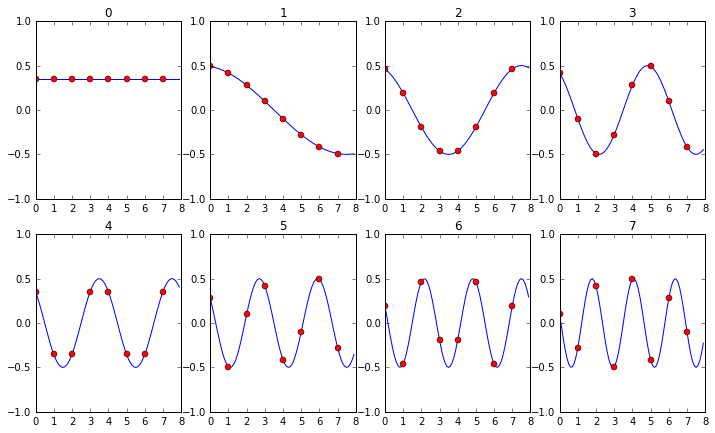

In [41]:
show_dct_fig()

<img src="img/Dctjpeg.png" width="600"/>

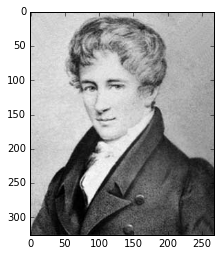

In [53]:
img = mpimg.imread('img/abel.jpg'); plt.imshow(img, cmap=mpl.cm.gray)

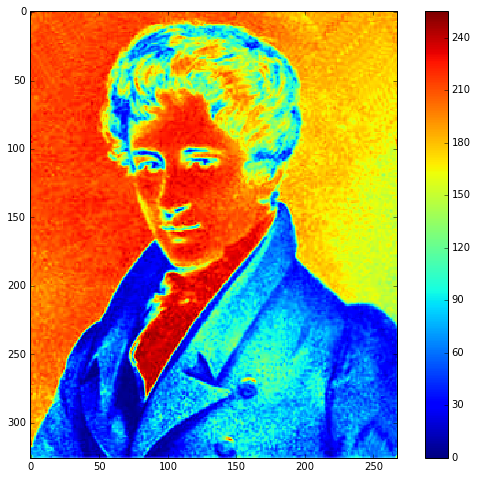

In [92]:
show_image(img)

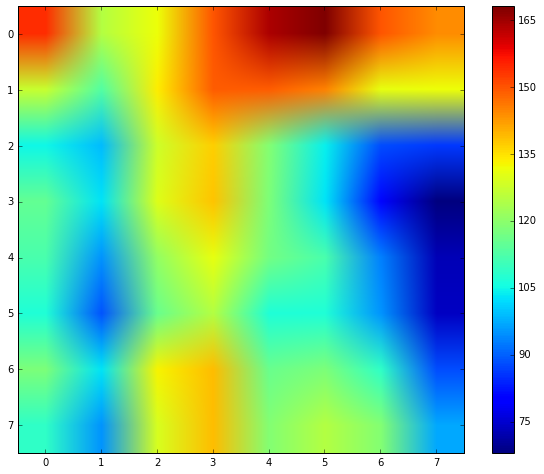

In [108]:
tiny = img[40:48, 64:72];show_image(tiny)

$$ G = {DCT} \cdot f \cdot {DCT}^{T} $$
$$ f = {DCT}^T \cdot G \cdot {DCT} $$

In [64]:
def doDCT(f):
    return dot(dot(dct, f), dct.T)

def undoDCT(G):
    return dot(dot(dct.T, G), dct)

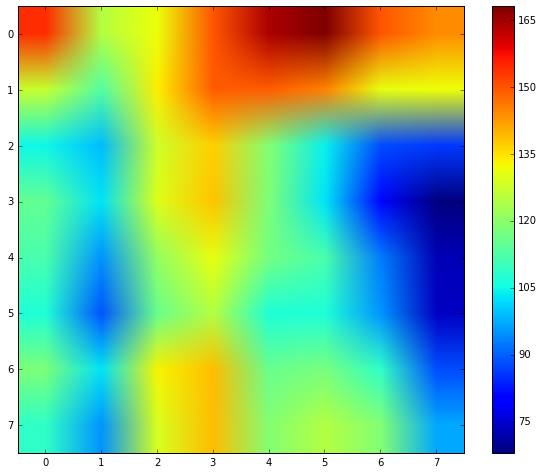

In [102]:
show_image(undoDCT(doDCT(tiny)))

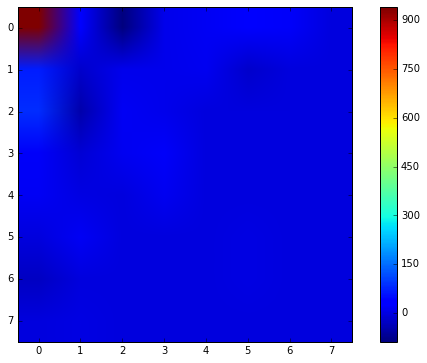

In [113]:
tinyDCT = doDCT(tiny);show_image(tinyDCT)

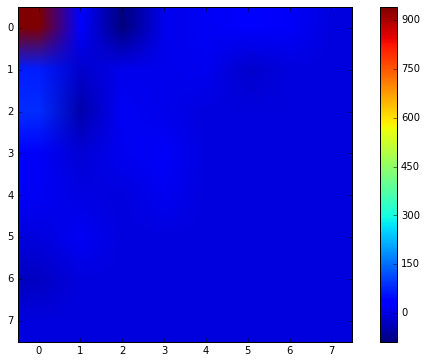

In [140]:
tinyDCT_chopped = chopped(tinyDCT, level=7);show_image(tinyDCT_chopped)

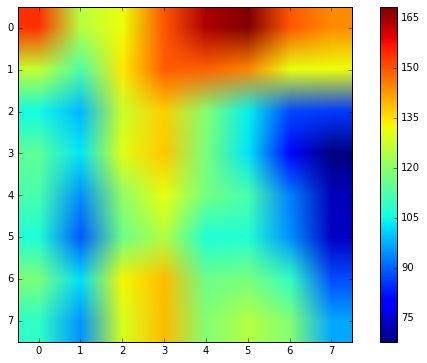

In [141]:
show_image(undoDCT(tinyDCT_chopped))

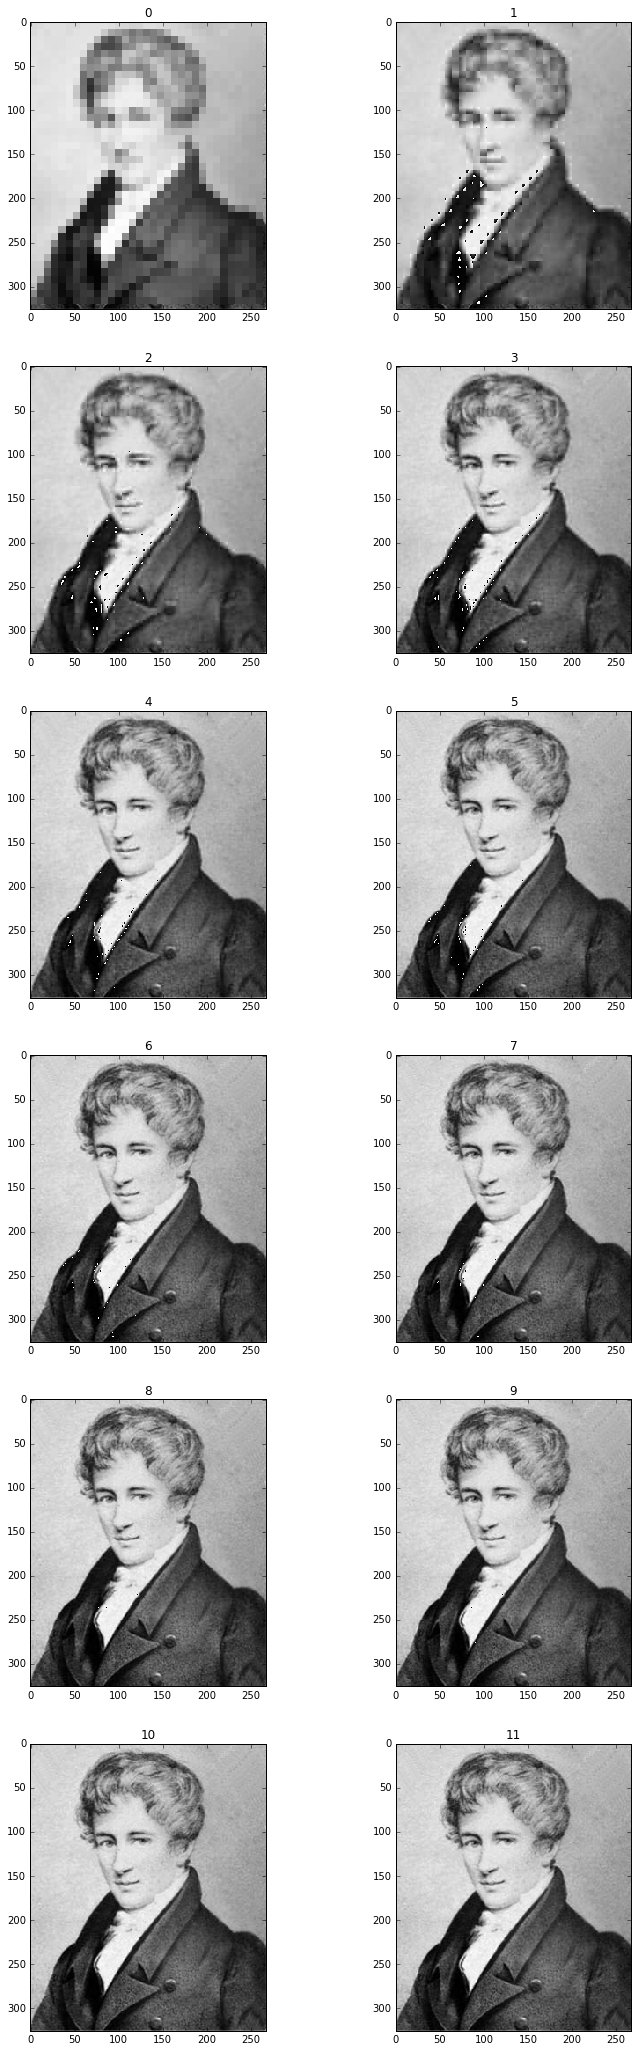

In [133]:
figure(figsize=(12,36))
for u in range(12):
    subplot(6, 2, u+1)
    title(str(u))
    imshow(dct_all(img, u), cmap=mpl.cm.gray, interpolation="none")

# Hybrid Image
A. Oliva, A. Torralba, P.G. Schyns (2006). Hybrid Images. ACM Transactions on Graphics, ACM Siggraph, 25-3, 527-530.

<img src="img/hybrid-me.png" />

<img src="img/e-highpass.png" />

<img src="img/m-lowpass.png" />

<img src="img/醫科.png" />

# Art Style Transfer
A Neural Algorithm of Artistic Style" by Gatys, Ecker and Bethge. (26 Aug 2015)

http://arxiv.org/abs/1508.06576, http://arxiv.org/abs/1505.07376, http://bethgelab.org/deepneuralart/.

<img src="img/ndhu.jpg" width=700 />

<img src="img/starry_night.jpg" width=700 />

<img src="img/ndhu-starry.png" width=700 />

<img src="img/skrik.jpg" />

<img src="img/ndhu-skrik.png" width=700 />

<img src="img/tjw-simpsons.png" />

# 乘法

<video src="video/mul.webm" controls width=800 /> 

### Credit
* 許多圖片素材來自 http://OpenClipart.org 的 CC0 授權圖片
* Public Domain 圖片
    * https://en.wikipedia.org/wiki/Niels_Henrik_Abel#/media/File:Niels_Henrik_Abel.jpg
    * https://en.wikipedia.org/wiki/Hybrid_image#/media/File:Hybrid_image_decomposition.jpg
    *  https://en.wikipedia.org/wiki/File:Dctjpeg.png
    * https://commons.wikimedia.org/wiki/File:Monroe_holding_hammer_in_The_Seven_Year_Itch_trailer_2.jpg
    * http://astro-canada.ca/_en/photo690.php?a3500_einstein1
* DCT 部份源自 http://cs.marlboro.edu/courses/spring2014/information/code/dct/dct.html (The MIT License)
* https://github.com/andersbll/neural_artistic_style (The MIT License)
* https://github.com/Newmu/dcgan_code/ (The MIT License)
* 東華大學照片 [by Ming Wei Wang CC-BY-SA 4.0](https://www.flickr.com/photos/5437ming/2245719753/in/photolist-hg5Lss-hg6jaU-hg5QdT-hg68eY-hg67fd-hg63YJ-hg5SKh-hg6WUz-hg6TKP-hg62SV-hg5ZN4-hg6VRT-hg5SxS-hg66h1-4wJDrY-z77Q7-hg63zA-hg5X7y-hg6915-hg72jX-hg6XVT-z775g-z78d7-z77zN-z77f1-hm5ARv-hhTYcX-hxnbvP-4qvZw9-h7yWGn-4qrUf6-oZwjnc-6omfZ2-6omfXc-6omfUk-6oqs67-6oqs39-6omfLn-6omfHt-9RUteS-6omfF4-6omfCv-6oqrPJ-6omfxK-eDpa4R-eDvhBm-eDvhGG-eDvhBh-eDvhBS-WVM5v)

